In [20]:
import pandas as pd
import datetime
from dateutil.parser import parse

In [21]:
df = pd.read_csv("chatwspfranco.csv")

In [22]:
df.head()

,Fecha,Mensaje
0,23/2/19 11:03,Hermano
1,23/2/19 11:03,Fuiste en la mañanas?
2,23/2/19 11:03,Quieres ir en la tarde?
3,23/2/19 11:09,Iba a ir tipo 4
4,23/2/19 11:09,Jajajaja


In [23]:
#Pasamos las fechas a formato date, y los mensajes en minusculas
df['Fecha'] = df['Fecha'].apply(lambda x: parse(x, dayfirst=True))
df['Mensaje'] = df['Mensaje'].apply(lambda x: x.lower())

## Limpieza del texto

primero reemplazamos todos los tildes por su caracter sin acentuación, y luego removemos todos los caracteres especiales
El último paso es remover todos los stopwords

In [24]:
from unicodedata import normalize

In [25]:
#sacado de https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l
trans_tab = dict.fromkeys(map(ord, u'\u0301\u0308'), None)

In [26]:
df['mensaje_limpio'] = df.Mensaje.apply(lambda x: normalize('NFKC', normalize('NFKD', x).translate(trans_tab)))

In [27]:
#eliminamos todo lo que no sea del alfabeto (números, emojis, caracteres especiales)
import re
def nontext(text):
    return re.sub(r'([^a-z\sñ])+', '', text)

In [28]:
df['mensaje_limpio'] = df.mensaje_limpio.apply(nontext)

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

In [30]:
df['mensaje_limpio'] = df['mensaje_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [32]:
df.head()

,Fecha,Mensaje,mensaje_limpio
0,2019-02-23 11:03:00,hermano,hermano
1,2019-02-23 11:03:00,fuiste en la mañanas?,mañanas
2,2019-02-23 11:03:00,quieres ir en la tarde?,quieres ir tarde
3,2019-02-23 11:09:00,iba a ir tipo 4,iba ir tipo
4,2019-02-23 11:09:00,jajajaja,jajajaja


## Bag of words

In [33]:
import collections

In [35]:
bagofwords = collections.Counter([y for x in df['mensaje_limpio'].values.flatten() for y in x.split()])

## Graficamos

In [36]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [38]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS
                     ).generate_from_frequencies(bagofwords)

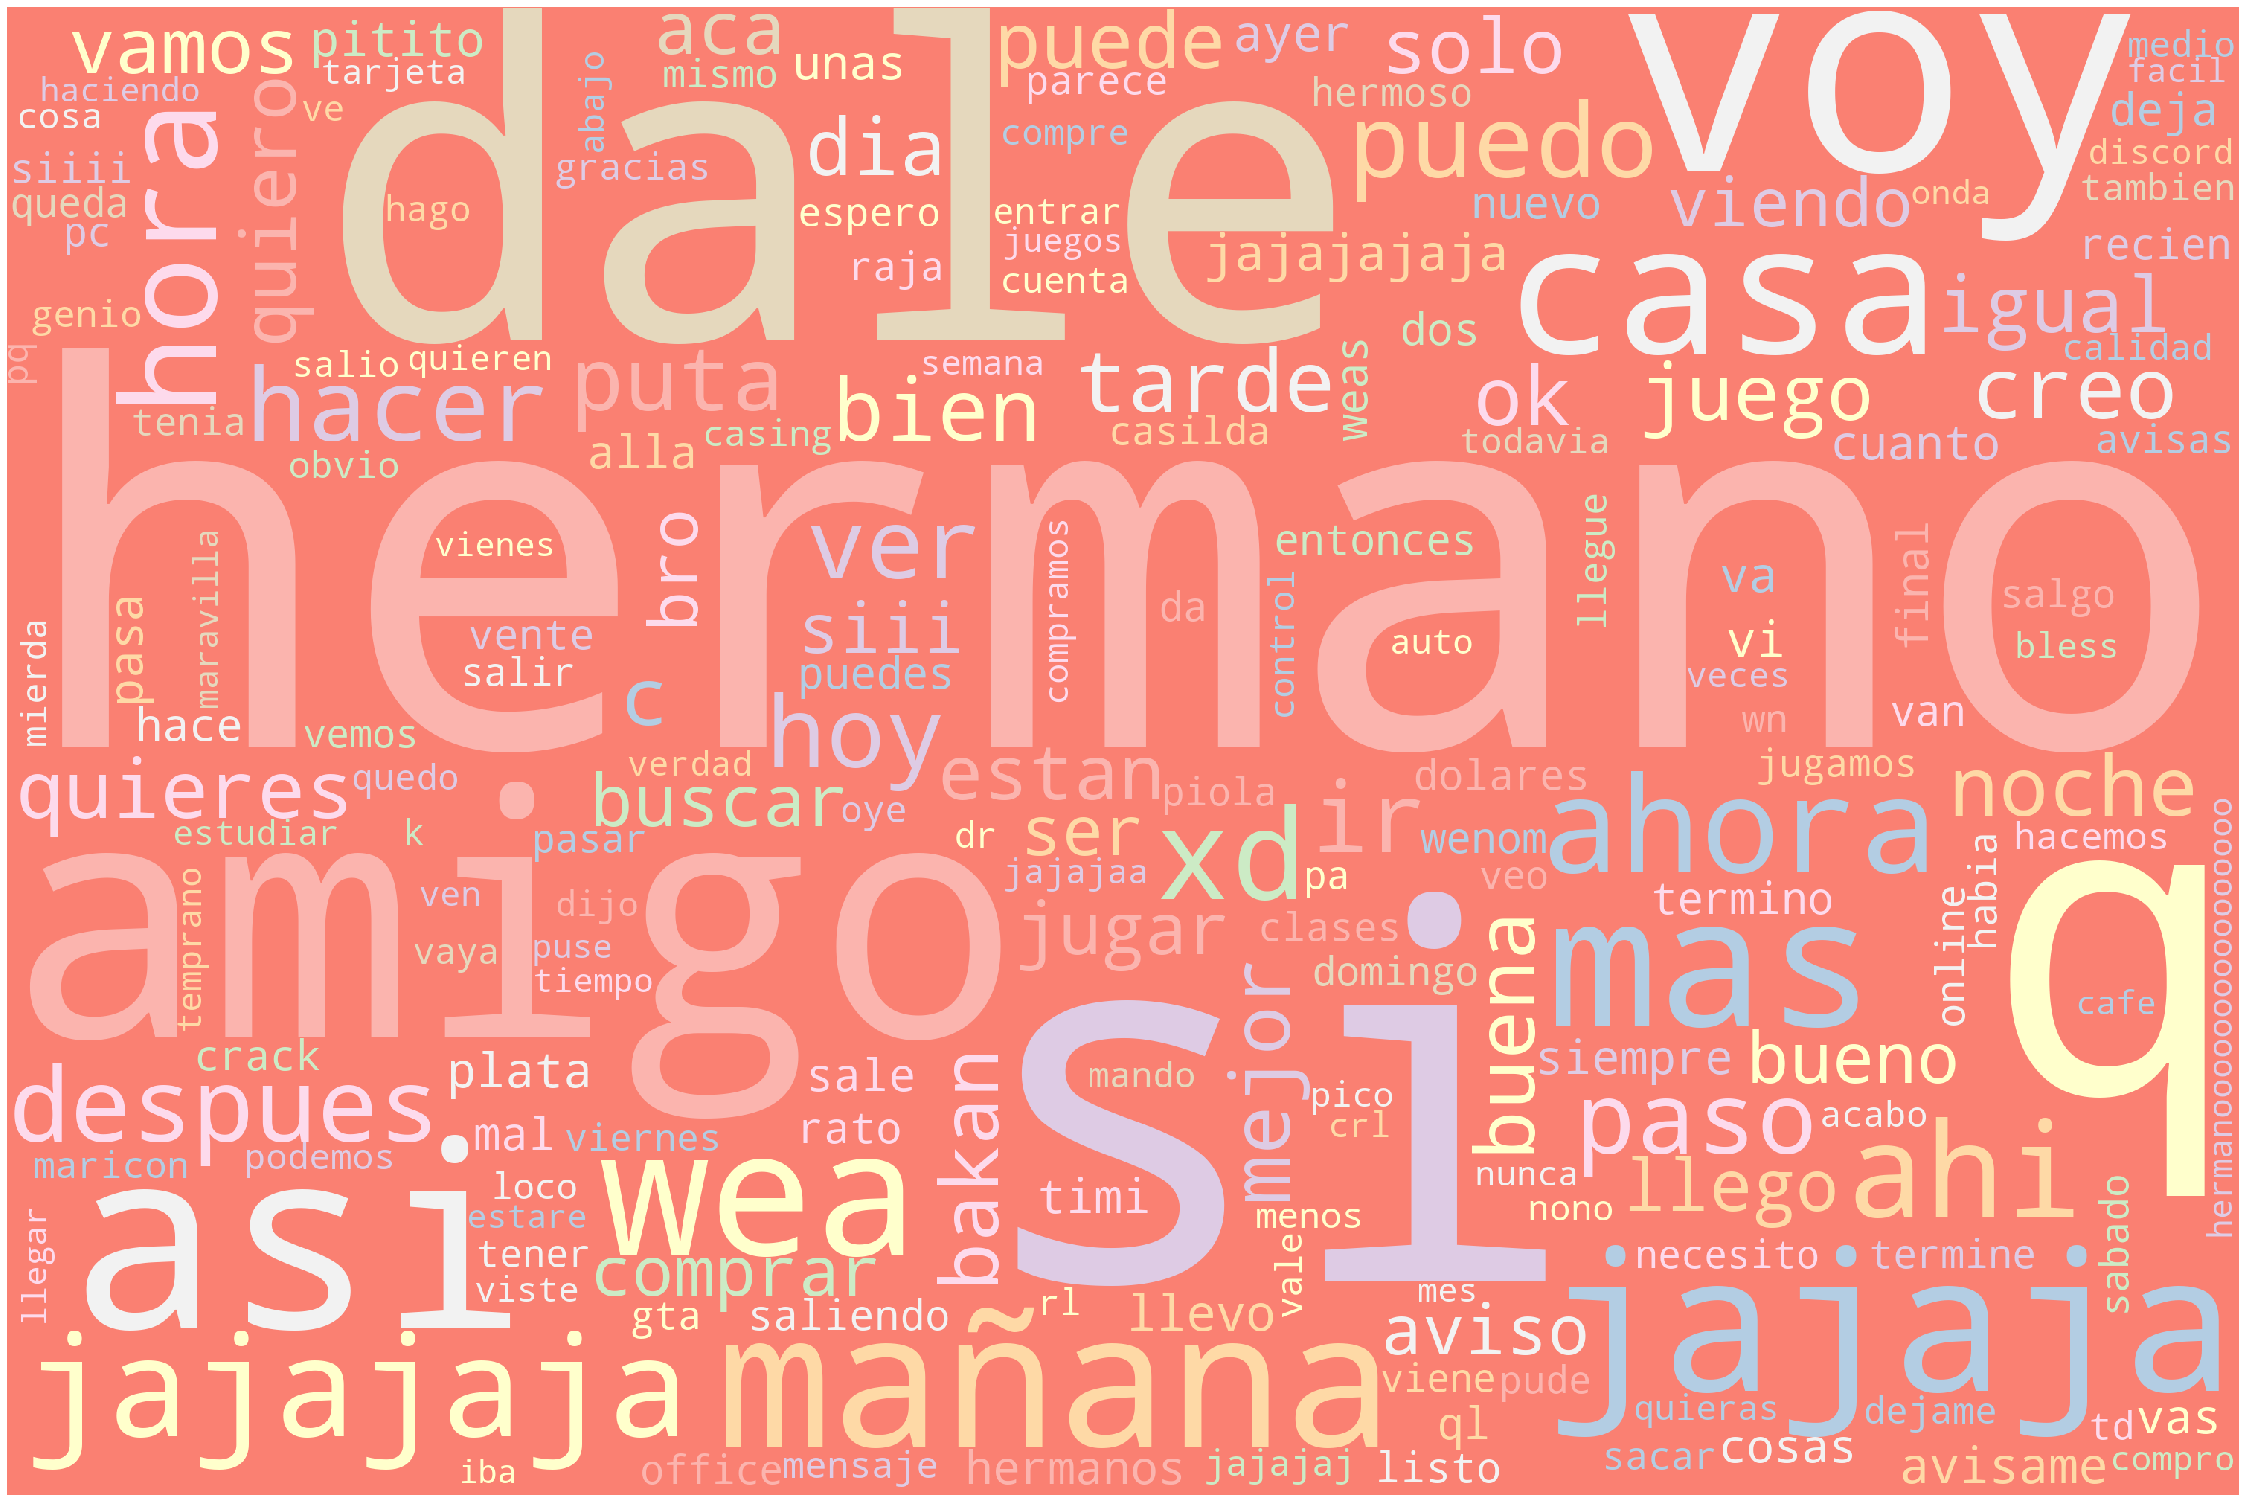

In [39]:
plot_cloud(wordcloud)